In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
# Load the data
oas = pd.read_csv("Housing.csv")

In [3]:
# View the dataframe
oas

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
# Display the summary of the dataframe to check for any missing or inconsistent data
oas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Check for missing values in the dataset
oas.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# Check for duplicates
oas.duplicated().sum()

0

In [7]:
# Convert categorical variables to numerical codes
oas["mainroad"] = oas["mainroad"].astype("category").cat.codes
oas["guestroom"] = oas["guestroom"].astype("category").cat.codes
oas["basement"] = oas["basement"].astype("category").cat.codes
oas["hotwaterheating"] = oas["hotwaterheating"].astype("category").cat.codes
oas["airconditioning"] = oas["airconditioning"].astype("category").cat.codes
oas["prefarea"] = oas["prefarea"].astype("category").cat.codes
oas["furnishingstatus"] = oas["furnishingstatus"].astype("category").cat.codes

In [8]:
oas

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [10]:
# Calculate correlation with price and sort values in ascending order
scaled = oas.copy()
scaled.corr()["price"].sort_values()

furnishingstatus   -0.304721
hotwaterheating     0.093073
basement            0.187057
guestroom           0.255517
mainroad            0.296898
prefarea            0.329777
bedrooms            0.366494
parking             0.384394
stories             0.420712
airconditioning     0.452954
bathrooms           0.517545
area                0.535997
price               1.000000
Name: price, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

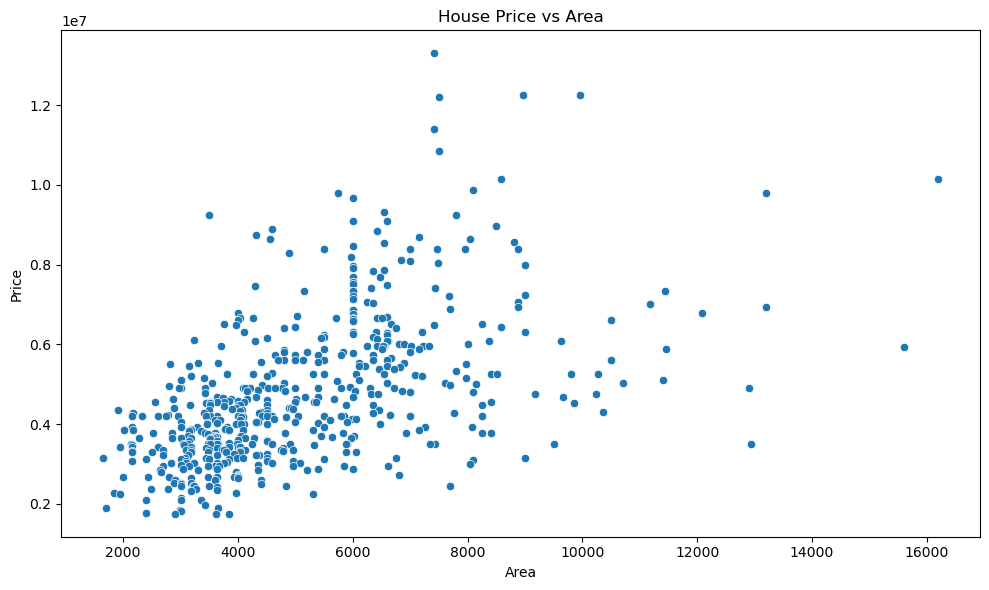

In [22]:
# Create scatter plot of price vs area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled, x='area', y='price')
plt.title('House Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

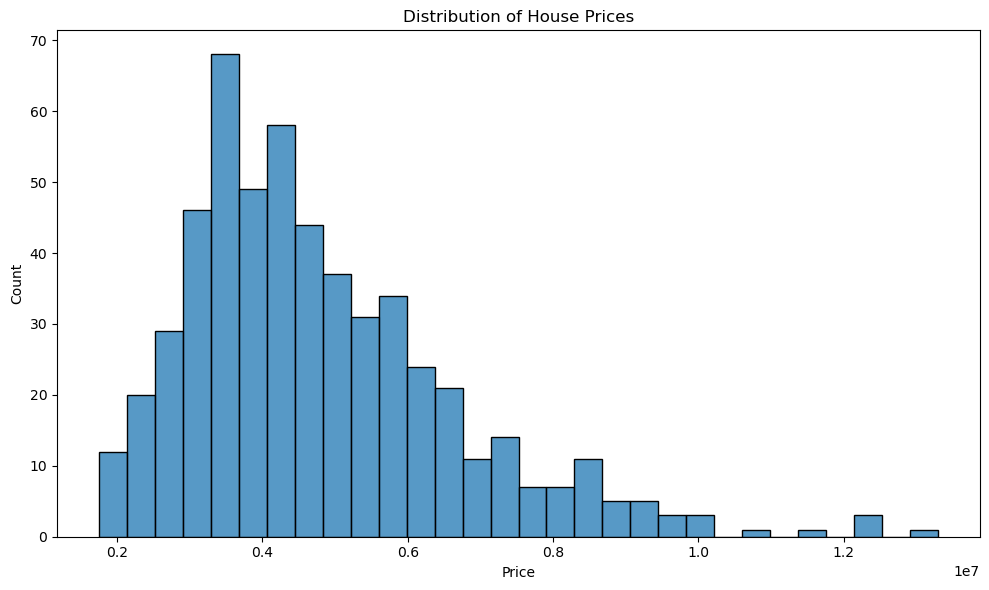

In [23]:
# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(data=scaled, x='price', bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [11]:
# Split data into features (X) and target variable (y)
x = scaled.drop("price", axis=1).values
y = scaled["price"].values

In [12]:
# Split data into training and test sets with fixed random seed
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [13]:
# Create and train a Linear Regression model on training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(x_train, y_train)

In [14]:
# Make predictions on test data and round to nearest integer
answers = model.predict(x_test).round()
answers

array([ 4014362.,  6199978.,  4411247.,  7282044.,  2854787.,  7109599.,
        3301351.,  3146633.,  3507495.,  8349470.,  6667486.,  3771370.,
        3748978.,  4649231.,  3940512.,  1978997.,  3977720.,  3609703.,
        3158649.,  4669244.,  5916672.,  6470858.,  4662356.,  2739398.,
        5345250.,  5776859.,  5313687.,  5519334.,  5678041.,  5806260.,
        3308519.,  6290252.,  7187553.,  2983899.,  4375451.,  5149286.,
        4980444.,  3646088.,  2942897.,  4016210.,  8093585.,  4967217.,
        6486160.,  3583583.,  3874156.,  6332535.,  4574399.,  2750848.,
        4130151.,  6548352.,  3987973.,  7096840.,  2563135.,  2938779.,
        3572809.,  5129342.,  7126871.,  4069889.,  2876647.,  4396096.,
        6020819.,  6756376.,  3327334.,  7239218.,  2602919.,  5126239.,
        6768009.,  2572510.,  3806601.,  5013062.,  4314620.,  7334732.,
        5105415.,  5937401.,  4154298.,  4582958.,  2926762.,  7615250.,
        2568592.,  3630876.,  4314620.,  6030016., 

In [15]:
# Get actual test values rounded to nearest integer
y_test.round()

array([ 4585000,  6083000,  4007500,  6930000,  2940000,  6195000,
        3535000,  2940000,  3500000,  7980000,  6755000,  3990000,
        3150000,  3290000,  4130000,  2660000,  4410000,  3710000,
        3360000,  4270000,  5005000,  5383000,  6440000,  1890000,
        6125000,  5460000,  5803000,  4620000,  5530000,  5950000,
        4305000,  3640000,  5250000,  3325000,  3703000,  4753000,
        9100000,  3500000,  3150000,  4270000,  8960000,  4060000,
        5740000,  3129000,  3633000,  7560000,  4620000,  3290000,
        4165000,  6650000,  4165000,  4690000,  3150000,  3850000,
        3290000,  5075000,  6510000,  5740000,  3780000,  4795000,
        4900000,  5460000,  3500000,  7525000,  2835000,  5495000,
        8680000,  4200000,  4200000,  4900000,  3332000,  6195000,
        4098500,  6650000,  3885000,  4620000,  1960000,  6440000,
        1750000,  3605000,  3290000,  4970000,  4613000,  3850000,
        3500000,  6107500,  3780000,  4900000,  3570000,  4340

<Axes: xlabel='Actual', ylabel='Predicted values'>

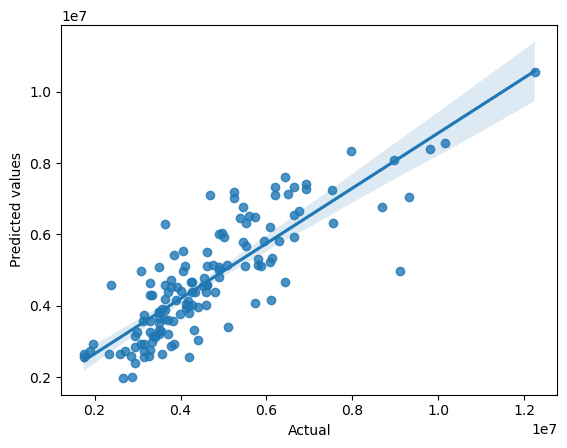

In [18]:
# Create scatter plot comparing actual vs predicted values with regression line
os = pd.DataFrame({"Actual": y_test, "Predicted values": answers})
sns.regplot(x="Actual", y="Predicted values", data=os)

In [19]:
# Calculate R-squared score as percentage to evaluate model performance
from sklearn.metrics import r2_score
r2_score(y_test, answers)*100

69.65206429698618